In [19]:
# Get required modules
import os
import sys
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [20]:
# Look at the jobs data
df = pd.read_csv('jobs_data.csv')
print('Dataset info:')
print(df.info())
print('\nFirst 5 rows:')
print(df.head(5))
print('\nColumn names:')
print(list(df.columns))

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 978 non-null    object 
 1   myId               2 non-null      object 
 2   num                978 non-null    int64  
 3   description        978 non-null    object 
 4   priority           978 non-null    object 
 5   customer           976 non-null    object 
 6   site               747 non-null    object 
 7   equipment          510 non-null    object 
 8   type               978 non-null    object 
 9   reportTemplate     978 non-null    object 
 10  createdBy          978 non-null    object 
 11  addressStreet      821 non-null    object 
 12  addressProvince    204 non-null    object 
 13  addressCity        850 non-null    object 
 14  addressZIP         51 non-null     object 
 15  addressCountry     733 non-null    object 
 16  address     

In [ ]:
#Extract technician names from nested JSON technician column
def extract_technician_name(tech):
    if pd.isna(tech):
        return None
    if isinstance(tech, dict):
        name = tech.get('name') # Get 'name' key
        if not name:
            print(f'No name in {tech}')
        return name or tech
    try:
        tech_dict = json.loads(tech) # Parse stringified JSON
        name = tech_dict.get('name') # Get 'name' key
        if not name:
            print(f'No name in {tech}')
        return name or tech
    
    except (json.JSONDecodeError, TypeError): #Handle bad JSON format or non-string values
        print(f'Error parsing {tech}') # Print error message
        return tech

df['technician'] = df['technician'].apply(extract_technician_name)

# Convert timestamp to datetime
time_cols = ['scheduledStart', 'scheduledEnd', 'actualStart', 'actualEnd', 'dateCreated', 'dateModified']
for col in time_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce') # 'Coerce' handles bad formats as NaT

# Calculate job duration
df['duration'] = ((df['actualEnd'] - df['actualStart']).dt.total_seconds()) / 3600

# Check for missing values or negative durations
print('Rows with missing values:', df['duration'].isnull().sum())
print('Rows with negative durations:', (df['duration'] < 0).sum())

# Filter to completed jobs for cleaner analysis
completed_jobs = df[df['status'] == 'completed']

# Quick look at cleaned data
print('\nFirst 5 rows of completed jobs:')
print(completed_jobs[['id', 'technician', 'actualStart', 'actualEnd', 'duration']].tail(5))


Error parsing {'id': 228150, 'name': 'ISINDA BAKARI', 'login': 'isinda.bakari'}
Error parsing {'id': 158965, 'name': 'GABRIEL SIMIYU', 'login': 'gabriel.simiyu'}
Error parsing {'id': 175531, 'name': 'SARAH AMUGA', 'login': 'sarah.amuga'}
Error parsing {'id': 110587, 'name': 'CHRISTOPHER OKOTH', 'login': 'christopher.okoth'}
Error parsing {'id': 150720, 'name': 'ZACHARY OJIGO', 'login': 'zach.ojigo'}
Error parsing {'id': 253682, 'name': 'GERISHOM KADENGE', 'login': 'gerishom.kadenge'}
Error parsing {'id': 110586, 'name': 'ELIAS KARIUKI', 'login': 'elias.kariuki'}
Error parsing {'id': 122644, 'name': 'CHARLES THUMBI', 'login': 'charles.thumbi'}
Error parsing {'id': 188982, 'name': 'LEONARD NGILA', 'login': 'leo.ngila'}
Error parsing {'id': 213946, 'name': 'PHILEMON JOASH', 'login': 'philemon.joash'}
Error parsing {'id': 213946, 'name': 'PHILEMON JOASH', 'login': 'philemon.joash'}
Error parsing {'id': 122748, 'name': 'JOSIAH OGUTU', 'login': 'josiah.ogutu'}
Error parsing {'id': 122748, 'n


Average duration by technician:
technician
{'id': 108901, 'name': 'RICHARD MUSYOKI', 'login': 'richard.musyoki'}         27.715333
{'id': 109060, 'name': 'JAMES MACHARIA', 'login': 'james.macharia'}           98.992063
{'id': 110586, 'name': 'ELIAS KARIUKI', 'login': 'elias.kariuki'}             61.041092
{'id': 110587, 'name': 'CHRISTOPHER OKOTH', 'login': 'christopher.okoth'}     66.786937
{'id': 110588, 'name': 'MUTINDA NICHOLAS', 'login': 'nicholas.mutinda'}       69.027083
{'id': 113458, 'name': 'JOHANA RUTO', 'login': 'johana.ruto'}                 36.864706
{'id': 115514, 'name': 'STEPHEN KILONZO', 'login': 'stephen.mativo'}          81.152778
{'id': 116493, 'name': 'DENNIS WACHIRAH', 'login': 'dennis.wachirah'}          2.956061
{'id': 117430, 'name': 'JOSEPH KIBUNJA', 'login': 'joseph.kibunja'}          290.179167
{'id': 119687, 'name': 'KENNEDY NYAMBOK', 'login': 'kennedy.nyambok'}         18.500000
{'id': 122644, 'name': 'CHARLES THUMBI', 'login': 'charles.thumbi'}         

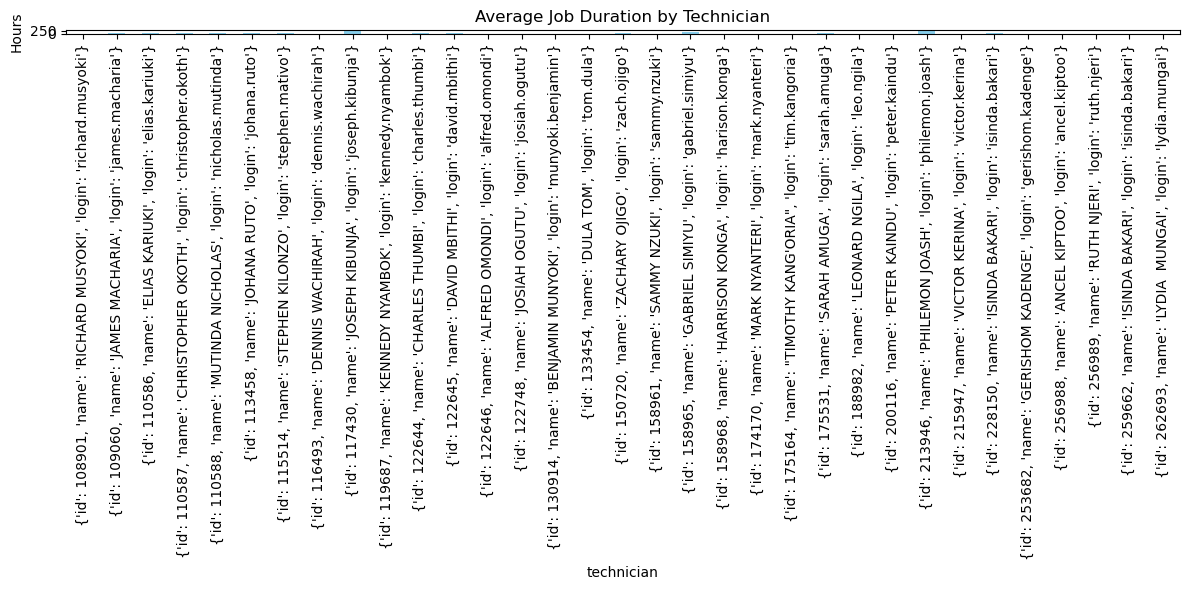


Number of jobs completed by technician:
technician
{'id': 256988, 'name': 'ANCEL KIPTOO', 'login': 'ancel.kiptoo'}              73
{'id': 200116, 'name': 'PETER KAINDU', 'login': 'peter.kaindu'}              68
{'id': 175164, 'name': "TIMOTHY KANG'ORIA", 'login': 'tim.kangoria'}         63
{'id': 109060, 'name': 'JAMES MACHARIA', 'login': 'james.macharia'}          63
{'id': 110586, 'name': 'ELIAS KARIUKI', 'login': 'elias.kariuki'}            58
{'id': 133454, 'name': 'DULA TOM', 'login': 'tom.dula'}                      56
{'id': 253682, 'name': 'GERISHOM KADENGE', 'login': 'gerishom.kadenge'}      45
{'id': 130914, 'name': 'BENJAMIN MUNYOKI', 'login': 'munyoki.benjamin'}      44
{'id': 175531, 'name': 'SARAH AMUGA', 'login': 'sarah.amuga'}                44
{'id': 110587, 'name': 'CHRISTOPHER OKOTH', 'login': 'christopher.okoth'}    37
{'id': 174170, 'name': 'MARK NYANTERI', 'login': 'mark.nyanteri'}            36
{'id': 256989, 'name': 'RUTH NJERI', 'login': 'ruth.njeri'}         

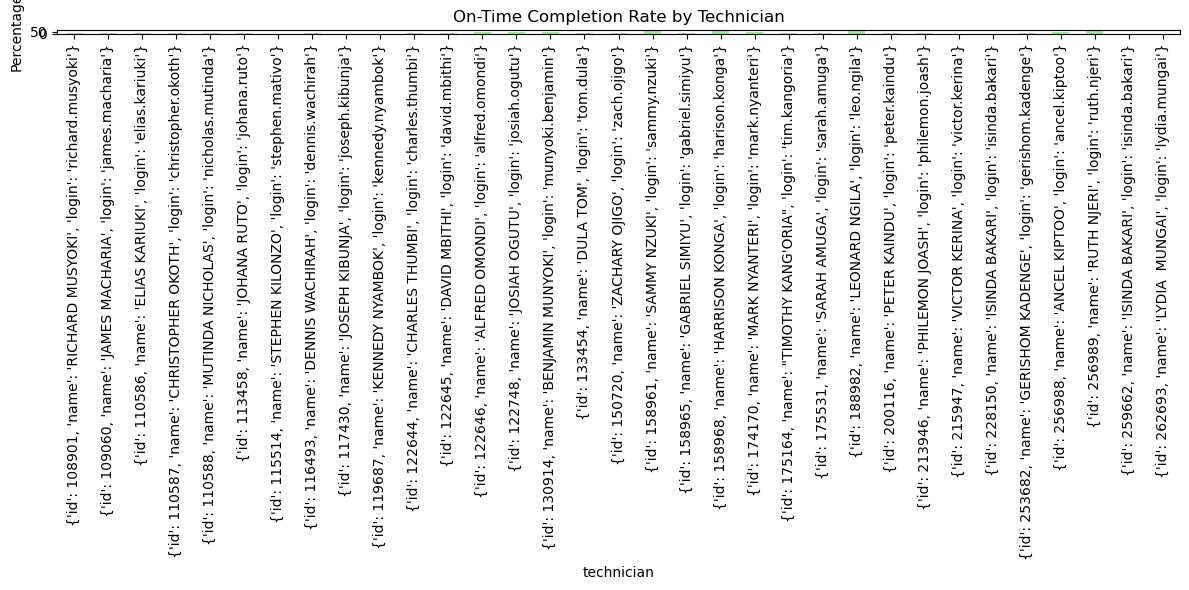

In [21]:
#Analyze Key Metrics
completed_jobs_ = completed_jobs.copy()

# Metric 1 - Average duration by technician
avg_duration = completed_jobs_.groupby('technician')['duration'].mean().dropna()
print('\nAverage duration by technician:')
print(avg_duration)

#Visualization 1 - Average duration by technician
avg_duration.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title('Average Job Duration by Technician')
plt.ylabel('Hours')
plt.tight_layout()
plt.show()

# Metric 2 - Number of jobs completed by technician
jobs_completed = completed_jobs_['technician'].value_counts()
print('\nNumber of jobs completed by technician:')
print(jobs_completed)

# Metric 3 - On-time completion rate by technician
completed_jobs_['on_time'] = completed_jobs_['actualEnd'] <= completed_jobs_['scheduledEnd']
on_time_rate = completed_jobs_.groupby('technician')['on_time'].mean() * 100
print('\nOn-time completion rate by technician:')
print(on_time_rate)

# Visualization 2 - On-time completion rate by technician
on_time_rate.plot(kind='bar', color='lightgreen', figsize=(12, 6))
plt.title('On-Time Completion Rate by Technician')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()